<h3> Applying Logistic Regression to Dataset </h3>

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('diabetes.csv')  
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h4> Split Data into Training and Testing </h4>

In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<h4> Grid search for hyper parameterss </h4>

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LG = LogisticRegression()
parameters = {'penalty':['l1', 'l2'], 
              'C': np.logspace(-3,3,7)
             }
            
clf = GridSearchCV(LG, parameters)
clf.fit(X_train, y_train)

/home/lmountjoy/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lmountjoy/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lmountjoy/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/lmountjoy/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/lmountjoy/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Esti

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [13]:
clf.best_score_, clf.best_params_

(0.7621884579501532, {'C': 0.1, 'penalty': 'l2'})

In [14]:
FinalLG = LogisticRegression()
FinalLG.set_params(**clf.best_params_)

FinalLG.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [15]:
print(FinalLG.score(X_train, y_train))
print(FinalLG.score(X_test, y_test))

0.7817589576547231
0.7792207792207793


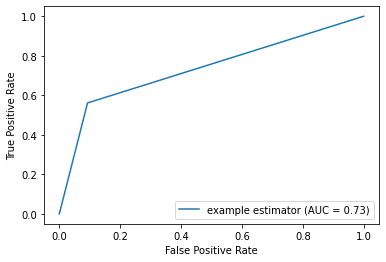

In [17]:
from sklearn import metrics

pred = FinalLG.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()